In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

print(pd.__version__)
print(np.__version__)

1.4.4
1.23.3


In [5]:
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [6]:
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [7]:
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

## 사이킷런 변환기 transformer

In [8]:
poly = PolynomialFeatures()
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[1. 2. 3. 4. 6. 9.]]


In [9]:
# 사이킷런 모델은 자동으로 특성에 추가된 절편 항을 무시한다. 명시적으로 지정함.
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[2. 3. 4. 6. 9.]]


In [10]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


### 변환기의 특성이 어떻게 만들어진건지 확인하는 방법

In [11]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [12]:
test_poly = poly.transform(test_input)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9903183436982125


In [15]:
print(lr.score(test_poly, test_target))

0.9714559911594111


In [16]:
# degree로 고차항의 최대 차수를 지정할 수 있다.
poly = PolynomialFeatures(include_bias=False, degree=5)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [17]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999999996433


In [18]:
print(lr.score(test_poly, test_target))

-144.40579436844948


## 정규화

- 반드시 훈련 세트로 학습한 변환기를 사용해 테스트 세트까지 변환.

In [19]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)


선형 회귀 모델에 규제를 추가한 모델을 릿지와 라쏘 라고 부른다.
- 릿지는 계수를 제곱한 값을 기준으로 규제를 적용. 조금 더 선호.
- 라쏘는 계수의 절대값을 기준으로 규제를 적용.

In [20]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [21]:
print(ridge.score(test_scaled, test_target))

0.9790693977615387


alpha 값을 바꿀 때 마다 score() 메서드의 결과를 저장할 리스트 생성

In [22]:
import matplotlib.pyplot as plt
train_score = []
test_score = []

In [23]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 릿지 모델 생성
    ridge = Ridge(alpha = alpha)

    # 릿지 모델을 훈련
    ridge.fit(train_scaled, train_target)

    # 훈련 점수와 테스트 점수를 저장.
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

### 로그함수
넘파이 로그 함수는 np.log()와 np.log10)이 있다.  
전자는 자연 상수 e를 밑으로 하는 자연로그.  
후자는 10을 밑으로 하는 상용로그.

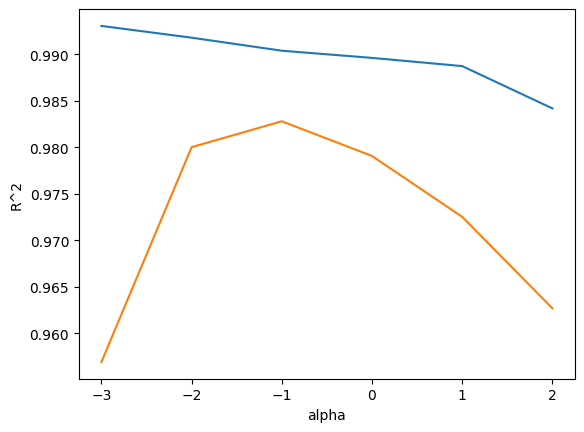

In [24]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

# 왼쪽은 훈련세트에 대해 과대적합된 전형적인 그래프
# 오른쪽은 과소적합
# 따라서 적절한 alpha 값은 두그래프가 가장 가깝고 테스트세트의 점수가 가장 높은 -1. 즉 10^-1 = 0.1

In [25]:
ridge = Ridge(alpha = 0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570367
0.9827976465386928


In [26]:
from sklearn.linear_model import Lasso

In [27]:
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.989789897208096


In [31]:
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 10, 100]
for alpha in alpha_list:
	# 라쏘 모델을 만든다.
	lasso = Lasso(alpha=alpha, max_iter=10000)

	# 라쏘 모델 훈련.
	lasso.fit(train_scaled, train_target)

	# 훈련점수와 테스트 점수 저장.
	train_score.append(lasso.score(train_scaled,train_target))
	test_score.append(lasso.score(test_scaled, test_target))
	

/home/lss/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/home/lss/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


그래프

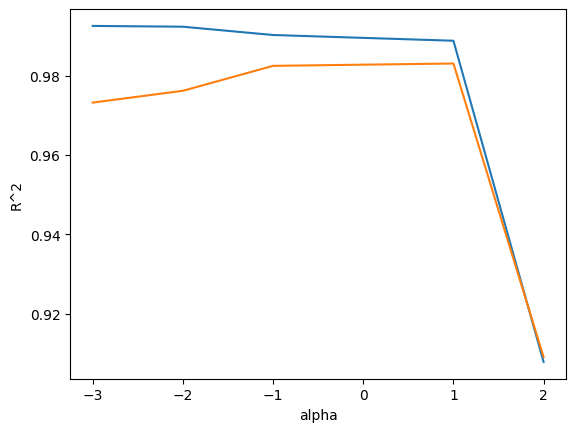

In [32]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [34]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [35]:
print(np.sum(lasso.coef_ == 0))

40
